## Customer Customization Project
### Description:
#### To segment customers into groups for a targeted marketing strategy and to develop a description of each group to be used by the marketing strategists..

In [108]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import warnings

warnings.filterwarnings('ignore')

In [109]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Meaning of each Column

- **CUST_ID**: ID of the credit card holder.
- **BALANCE**: The remaining balance in the account.
- **BALANCE_FREQUENCY**: How often the balance gets updated (1 means very often, 0 means rarely).
- **PURCHASES**: Total amount spent on purchases.
- **ONEOFF_PURCHASES**: The largest single purchase made.
- **INSTALLMENTS_PURCHASES**: Total amount spent on installment-based purchases.
- **CASH_ADVANCE**: Cash withdrawn in advance by the user.
- **PURCHASES_FREQUENCY**: How often purchases are made (1 means frequently, 0 means rarely).
- **ONEOFFPURCHASESFREQUENCY**: How often one-off purchases (single large purchases) are made.
- **PURCHASESINSTALLMENTSFREQUENCY**: How often purchases are made in installments.
- **CASHADVANCEFREQUENCY**: How often cash advances are taken.
- **CASHADVANCETRX**: Number of cash advance transactions.
- **PURCHASES_TRX**: Number of purchase transactions made.
- **CREDIT_LIMIT**: Maximum credit limit for the user.
- **PAYMENTS**: Total payments made by the user.
- **MINIMUM_PAYMENTS**: Minimum payments made by the user.
- **PRCFULLPAYMENT**: Percentage of the total balance that was paid off in full.
- **TENURE**: How long the user has had the credit card account.

In [110]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Descriptive Statistics


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Explanation
Datatype is accurate for the fields but we discover MINIMUM_PAYMENTS and CREDIT_LIMITS are having some missing values

In [112]:
missing_data = data.isnull().sum()
missing_data

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [113]:
print(missing_data[missing_data > 0])

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


### Missing Data
 Data has missing values for Credit Limit and Minimum Payments fields

In [114]:
# replace null
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


In [115]:
# replace the minimum payment by takeing
#2% of the balance + 0.5% of payments and 0.01% of credit_limit

data['MINIMUM_PAYMENTS'].fillna((data['BALANCE'] * 0.02) + (data['PAYMENTS'] * 0.005) + (data['CREDIT_LIMIT'] * 0.001), inplace=True
)

In [116]:
missing_data = data.isnull().sum()
missing_data

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [117]:
# Find duplicates
duplicated = data.duplicated()
duplicated[duplicated == True]

Series([], dtype: bool)

#### The data has no duplicates

In [118]:
labels = data[['CUST_ID']]
labels.head()

CUST_ID
0  C10001
1  C10002
2  C10003
3  C10004
4  C10005

In [119]:
features = data.drop(columns='CUST_ID')
features.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000         40.833411          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [120]:
corr = features.corr()
corr

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531296           0.095931   0.356977   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.399797           0.140504   0.096991   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319735                0.256515   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.051173                0.135176   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303997             0.119833   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.141563             0.007861   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

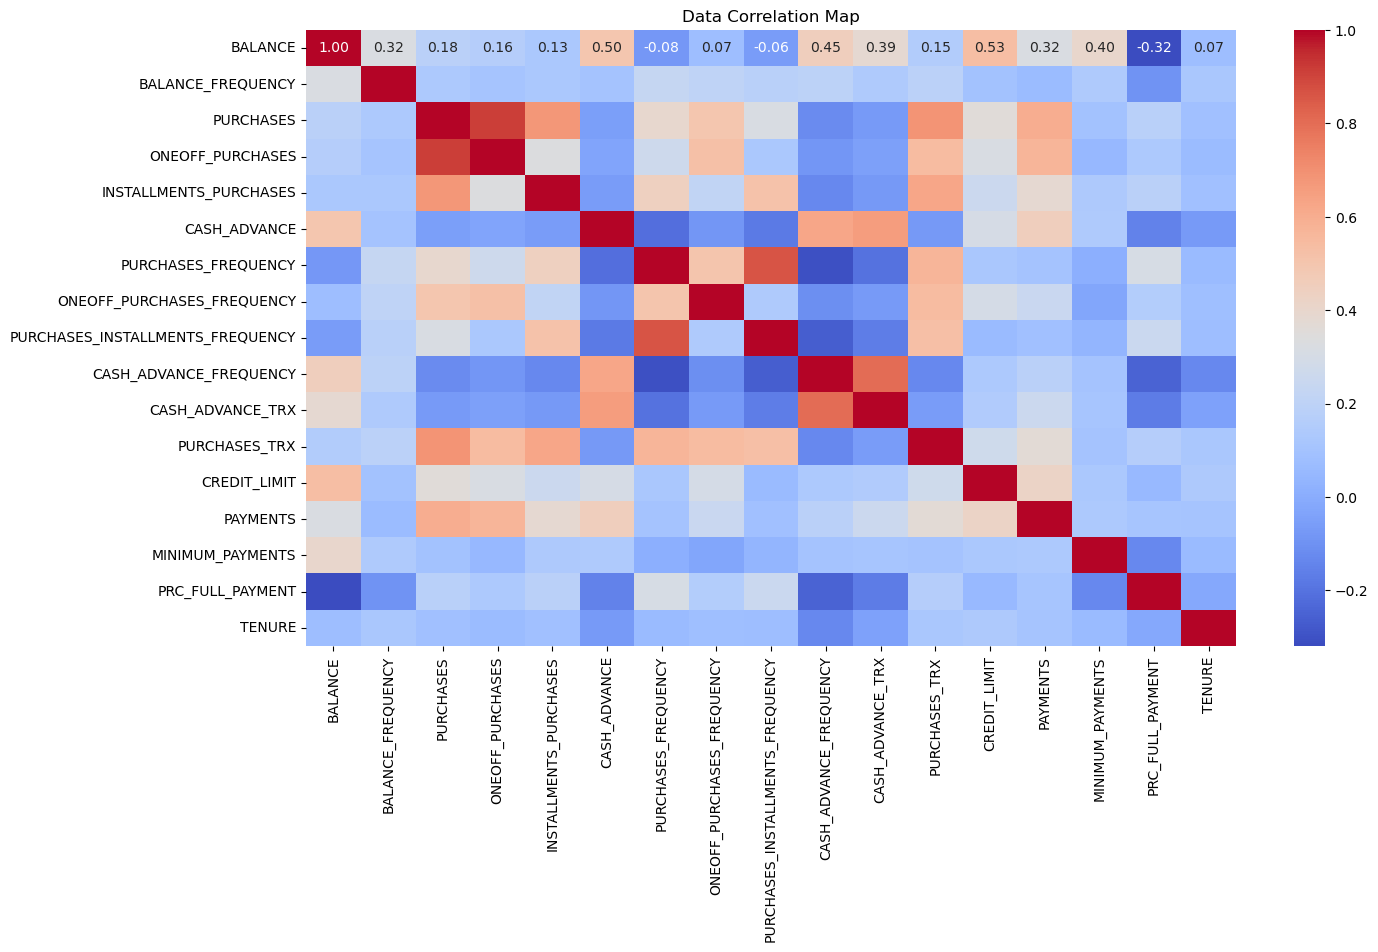

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Data Correlation Map")
plt.show()

## Explanation:
The dataset presents a mix of customer behavior in terms of purchases, credit use, and repayment habits. Strong positive correlations are observed between related variables such as one-off purchases and total purchases, as well as between cash advances and the frequency of cash advances.

Weak correlations and negative values suggest distinct behavioral segments within the dataset. For instance, customers who frequently take cash advances tend to make fewer purchases, and those who regularly make full payments tend to have lower balances.

This analysis suggests that customers can be grouped based on their purchase, credit, and repayment behaviors. These insights could help design targeted strategies, such as offering installment plans to frequent purchasers or reducing credit limits for high cash-advance users.


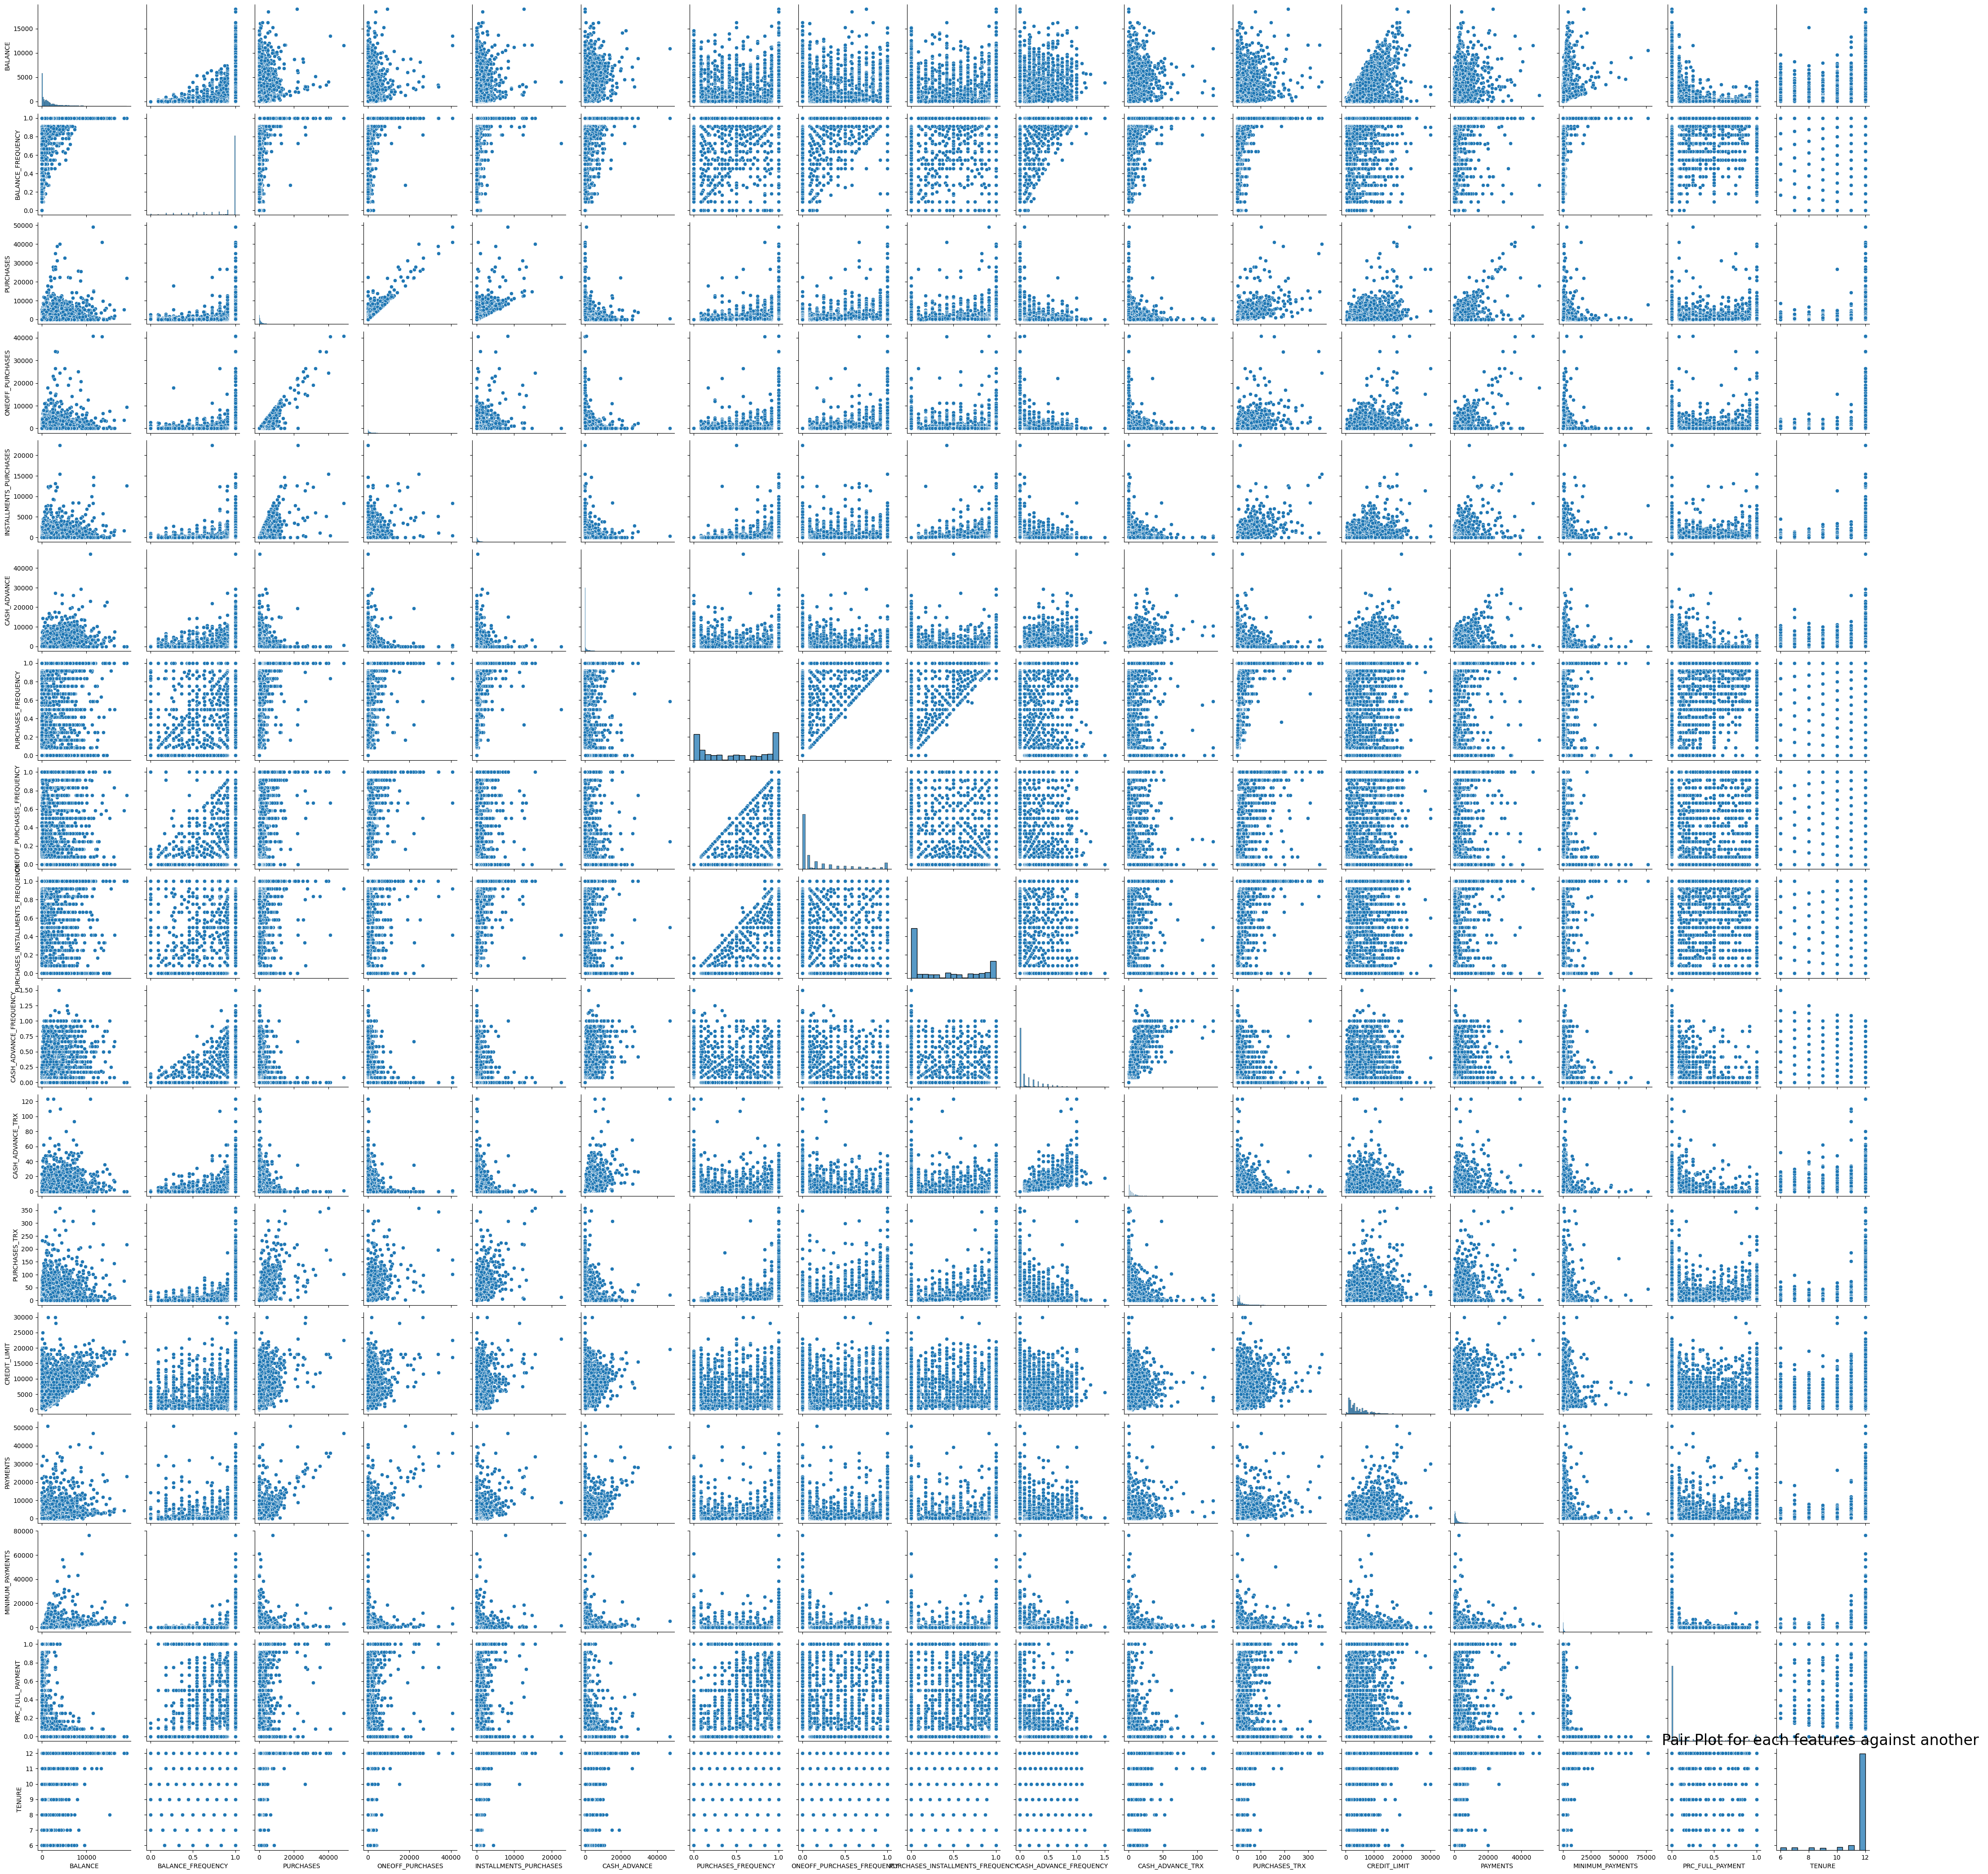

In [27]:
sns.pairplot(features)
plt.title("Pair Plot for each features against another ", fontsize=24)
plt.show()

## Data Scaling

In [121]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)
scaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.055555           0.00813       0.002793      0.248748   
4                0.000000           0.00000       0.002793      0.038397   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014034          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.000534          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

## PCA Transformation

In [122]:
# Perform PCA without specifying the number of components
pca = PCA()  # No n_components specified, so PCA will keep all components
pca_result = pca.fit_transform(scaled_data)

a=pd.DataFrame(pca_result)
a.head()

0         1         2         3         4         5         6   \
0 -0.482169 -0.097652 -0.046482 -0.058265  0.110004 -0.171657  0.018609   
1 -0.608574 -0.019377  0.082093 -0.218774 -0.099000  0.137019  0.047464   
2  0.304508  0.920929  0.012282  0.160072  0.162313 -0.158516 -0.006542   
3 -0.588625 -0.005649  0.037135  0.004502  0.223735  0.065257  0.096044   
4 -0.554357  0.052983 -0.084185 -0.132815 -0.017038 -0.204462  0.056410   

         7         8         9         10        11        12        13  \
0  0.015993  0.013096  0.023022 -0.002382 -0.010626  0.004736 -0.001311   
1  0.001856  0.005898 -0.002428  0.057573 -0.031652 -0.040535 -0.015531   
2 -0.277869  0.008537 -0.016612 -0.003771 -0.012035 -0.006782  0.015609   
3 -0.020043 -0.041570 -0.000046 -0.031168  0.029377  0.023730 -0.012406   
4  0.051727  0.019911  0.000588  0.014643 -0.010025  0.002836 -0.000461   

         14        15            16  
0 -0.005783 -0.003330 -6.749396e-06  
1  0.001736 -0.050883  1.376832e-07  
2 -0.014820  0.008082  9.336906e-07  
3 -0.003292 -0.015208 -4.878099e-07  
4 -0.008335  0.004707 -3.420805e-06

In [123]:
# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {ratio:.4f}")



Explained Variance Ratios:
Component 1: 0.4960
Component 2: 0.1405
Component 3: 0.1284
Component 4: 0.0768
Component 5: 0.0696
Component 6: 0.0359
Component 7: 0.0182
Component 8: 0.0135
Component 9: 0.0066
Component 10: 0.0055
Component 11: 0.0028
Component 12: 0.0019
Component 13: 0.0013
Component 14: 0.0012
Component 15: 0.0011
Component 16: 0.0007
Component 17: 0.0000


In [124]:
# Determine how many components to keep for 95% of the explained variance
cumulative_variance = np.cumsum(explained_variance_ratios)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nNumber of components to keep for 95% variance: {num_components_95}")




Number of components to keep for 95% variance: 7


In [125]:
# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"Component {i+1}: {cum_var:.4f}")


Cumulative Explained Variance:
Component 1: 0.4960
Component 2: 0.6365
Component 3: 0.7650
Component 4: 0.8417
Component 5: 0.9114
Component 6: 0.9472
Component 7: 0.9654
Component 8: 0.9790
Component 9: 0.9855
Component 10: 0.9910
Component 11: 0.9939
Component 12: 0.9957
Component 13: 0.9970
Component 14: 0.9982
Component 15: 0.9993
Component 16: 1.0000
Component 17: 1.0000


### PCA Transformation with specified component (95%)

In [126]:
# PCA with the determined number of components
pca_final = PCA(n_components=num_components_95)  # Set n_components to keep 95% variance
pca_result = pca_final.fit_transform(scaled_data)

pca_data_reduction =pd.DataFrame(pca_result)
pca_data_reduction.head()

0         1         2         3         4         5         6
0 -0.482169 -0.097652 -0.046482 -0.058265  0.110004 -0.171657  0.018609
1 -0.608574 -0.019377  0.082093 -0.218774 -0.099000  0.137019  0.047464
2  0.304508  0.920929  0.012282  0.160072  0.162313 -0.158516 -0.006542
3 -0.588625 -0.005649  0.037135  0.004502  0.223735  0.065257  0.096044
4 -0.554357  0.052983 -0.084185 -0.132815 -0.017038 -0.204462  0.056410

In [127]:
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC_{i+1}" for i in range(num_components_95)])


In [128]:
# Display the new DataFrame
print("PCA Result DataFrame:")
pca_df.head()

PCA Result DataFrame:


PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0 -0.482169 -0.097652 -0.046482 -0.058265  0.110004 -0.171657  0.018609
1 -0.608574 -0.019377  0.082093 -0.218774 -0.099000  0.137019  0.047464
2  0.304508  0.920929  0.012282  0.160072  0.162313 -0.158516 -0.006542
3 -0.588625 -0.005649  0.037135  0.004502  0.223735  0.065257  0.096044
4 -0.554357  0.052983 -0.084185 -0.132815 -0.017038 -0.204462  0.056410

In [129]:
# Additional information
print(f"\nNumber of components kept for 95% variance: {num_components_95}")


Number of components kept for 95% variance: 7


## Clustering [kmeans, hierarical and dbscan]

In [130]:
# Step 2: Define clustering models and hyperparameters
results = []

# K-Means clustering
k_values = [2, 3, 4, 5, 6]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, labels)
    results.append({'Model': 'KMeans', 'n_clusters': k, 'Silhouette Score': silhouette_avg})

# Hierarchical clustering
linkage_methods = ['ward', 'complete', 'average']
for linkage in linkage_methods:
    for k in range(2, 7):  # Vary number of clusters from 2 to 6
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = hierarchical.fit_predict(pca_df)
        silhouette_avg = silhouette_score(pca_df, labels)
        results.append({'Model': 'Hierarchical', 'n_clusters': k, 'Linkage': linkage, 'Silhouette Score': silhouette_avg})

# DBSCAN clustering
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df)
        if len(set(labels)) > 1:  # At least 2 clusters are needed to calculate silhouette score
            silhouette_avg = silhouette_score(pca_df, labels)
            results.append({'Model': 'DBSCAN', 'Epsilon': eps, 'Min Samples': min_samples, 'Silhouette Score': silhouette_avg})
        else:
            results.append({'Model': 'DBSCAN', 'Epsilon': eps, 'Min Samples': min_samples, 'Silhouette Score': None})



In [131]:
# Step 3: Create a DataFrame to store results
results_df = pd.DataFrame(results)

# Display the results
print("Clustering Model Results:")
sorted_results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
sorted_results_df

Clustering Model Results:


Model  n_clusters  Silhouette Score   Linkage  Epsilon  Min Samples
0         KMeans         2.0          0.398682       NaN      NaN          NaN
1         KMeans         3.0          0.383717       NaN      NaN          NaN
10  Hierarchical         2.0          0.368216  complete      NaN          NaN
16  Hierarchical         3.0          0.356747   average      NaN          NaN
4         KMeans         6.0          0.351564       NaN      NaN          NaN
5   Hierarchical         2.0          0.339729      ward      NaN          NaN
3         KMeans         5.0          0.336263       NaN      NaN          NaN
2         KMeans         4.0          0.336154       NaN      NaN          NaN
11  Hierarchical         3.0          0.327308  complete      NaN          NaN
24        DBSCAN         NaN          0.324680       NaN      0.5         10.0
25        DBSCAN         NaN          0.320875       NaN      0.5         15.0
23        DBSCAN         NaN          0.318436       NaN      0.5          5.0
17  Hierarchical         4.0          0.318374   average      NaN          NaN
18  Hierarchical         5.0          0.313118   average      NaN          NaN
19  Hierarchical         6.0          0.310889   average      NaN          NaN
6   Hierarchical         3.0          0.309256      ward      NaN          NaN
15  Hierarchical         2.0          0.299967   average      NaN          NaN
7   Hierarchical         4.0          0.262578      ward      NaN          NaN
9   Hierarchical         6.0          0.245294      ward      NaN          NaN
8   Hierarchical         5.0          0.231668      ward      NaN          NaN
21        DBSCAN         NaN          0.202858       NaN      0.3         10.0
22        DBSCAN         NaN          0.202299       NaN      0.3         15.0
14  Hierarchical         6.0          0.142224  complete      NaN          NaN
12  Hierarchical         4.0          0.119619  complete      NaN          NaN
13  Hierarchical         5.0          0.117279  complete      NaN          NaN
20        DBSCAN         NaN          0.067876       NaN      0.3          5.0
26        DBSCAN         NaN               NaN       NaN      0.7          5.0
27        DBSCAN         NaN               NaN       NaN      0.7         10.0
28        DBSCAN         NaN               NaN       NaN      0.7         15.0

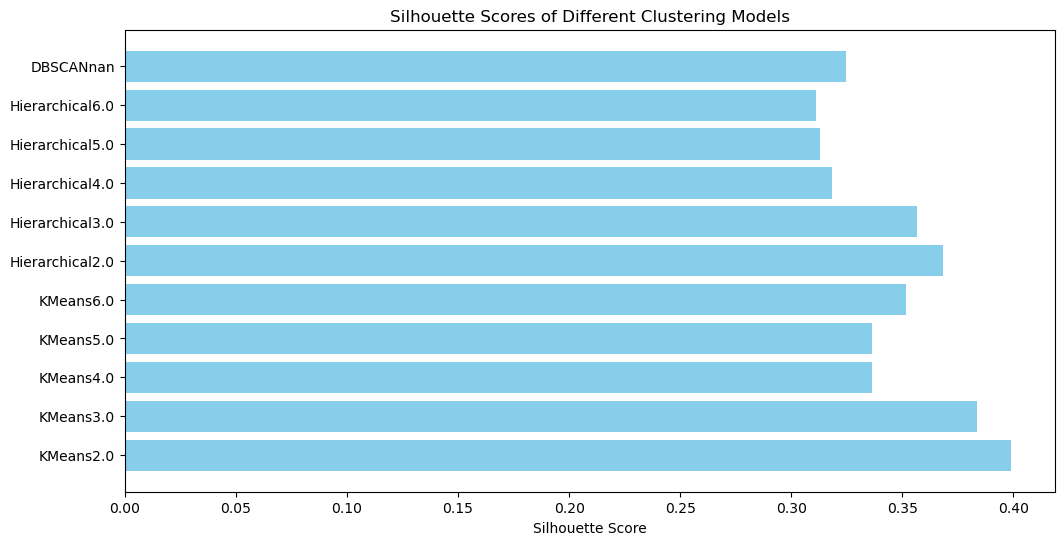

In [132]:
# Optional: Plotting the silhouette scores for better visualization
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'] + (results_df['n_clusters'].astype(str) if 'n_clusters' in results_df else ''),
         results_df['Silhouette Score'], color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores of Different Clustering Models')
plt.show()

## Selection of Best Model

Although we had a cluster 2 for a KMeans having the highest score we decided to go with 3 Clusters after testing other clusters to see how the points are well clustered. 

We also observed that the silhouette score for each of the models tried was much better and higher than that from the previous assignment where we were having a negative. Although our best model in the previous assignment was 0.65 approximately which is way higher that all the score we got using the PCA

In [172]:
#Use Best model to cluster and append result in dataframe

bestModel = KMeans(n_clusters=3, random_state=42) #AgglomerativeClustering(n_clusters=3, linkage='average')

labels = bestModel.fit_predict(pca_df)
features['Cluster'] = labels
pca_df['Cluster'] = labels
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.482169 -0.097652 -0.046482 -0.058265  0.110004 -0.171657  0.018609   
1 -0.608574 -0.019377  0.082093 -0.218774 -0.099000  0.137019  0.047464   
2  0.304508  0.920929  0.012282  0.160072  0.162313 -0.158516 -0.006542   
3 -0.588625 -0.005649  0.037135  0.004502  0.223735  0.065257  0.096044   
4 -0.554357  0.052983 -0.084185 -0.132815 -0.017038 -0.204462  0.056410   

   Cluster  
0        1  
1        1  
2        2  
3        1  
4        1

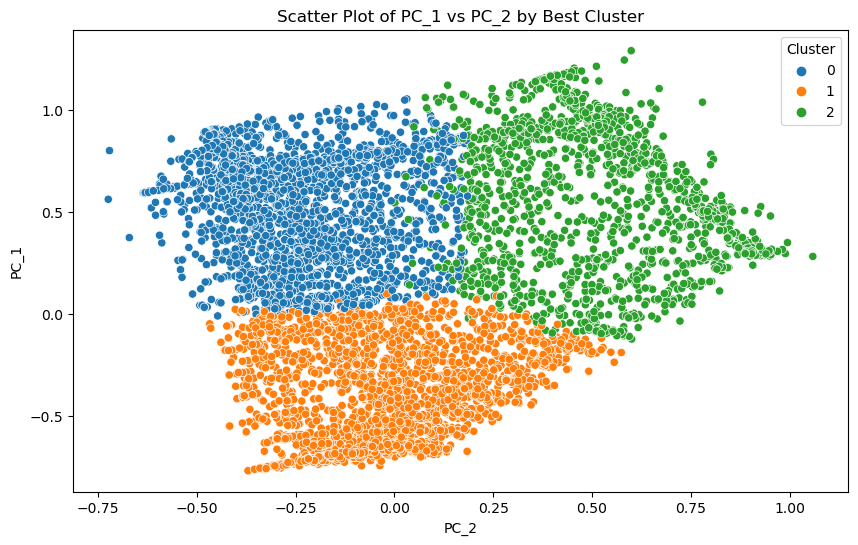

In [147]:
# SCATTER PLOT WITH Best Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, y='PC_1', x='PC_2', hue='Cluster', palette='tab10')
plt.title('Scatter Plot of PC_1 vs PC_2 by Best Cluster')
plt.xlabel('PC_2')
plt.ylabel('PC_1')
plt.legend(title='Cluster')
plt.show()

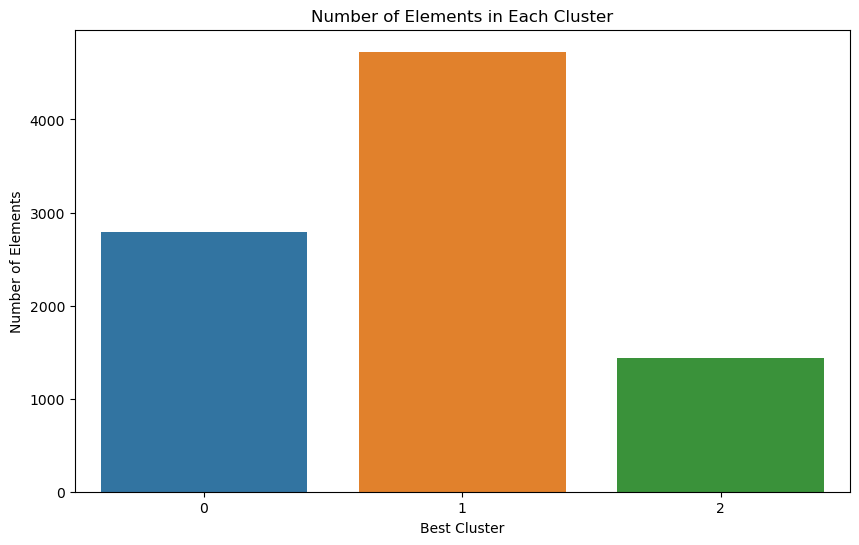

In [135]:
# Plotting a histogram showing the number of elements in each Agglomerative cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=pca_df, palette='tab10')
plt.title('Number of Elements in Each Cluster')
plt.xlabel('Best Cluster')
plt.ylabel('Number of Elements')
plt.show()

## Cluster Analysis

## Cluster 0 (Blue):
- Distribution: This cluster is tightly grouped around the center of the plot, indicating a moderate spread of data points.
- Characteristics: The data points in this cluster have moderate values for both PC_1 and PC_2.
- Implications: Customers in this cluster might represent a balanced segment with average characteristics in terms of the variables represented by PC_1 and PC_2.

## Cluster 1 (Orange
- Distribution: This cluster is the most spread out, with data points extending across a wide range of PC_1 and PC_2 values.
- Characteristics: The wide spread suggests a diverse group of customers with varying characteristics.
- Implications: Marketing strategies for this cluster should be flexible and adaptable to cater to the diverse needs and preferences of these customers.

## Cluster 2 (Green):
- Distribution: This cluster is tightly grouped in the upper right quadrant of the plot, indicating high values for both PC_1 and PC_2.
- Characteristics: Customers in this cluster likely have high scores on the variables represented by PC_1 and PC_2.
- Implications: This cluster might represent high-value customers who could benefit from premium services and personalized offers. interests.ss their specific interests.

In [136]:
# Separate DataFrames for each cluster
clusters = pca_df['Cluster'].unique()
cluster_dfs = {cluster: pca_df[pca_df['Cluster'] == cluster] for cluster in clusters}


In [137]:
cluster_3 = cluster_dfs[0]['Cluster'].unique()
print("Cluster ", cluster_3[0] , " Statistics/Descriptions")
cluster_dfs[0].describe()

Cluster  0  Statistics/Descriptions


PC_1         PC_2         PC_3         PC_4         PC_5  \
count  2786.000000  2786.000000  2786.000000  2786.000000  2786.000000   
mean      0.552825    -0.253525    -0.071041    -0.011371    -0.021509   
std       0.247260     0.174692     0.321894     0.224135     0.211892   
min      -0.010825    -0.723719    -0.542571    -0.427624    -0.822934   
25%       0.362607    -0.375189    -0.318264    -0.104717    -0.100246   
50%       0.631094    -0.290132    -0.212193    -0.037393     0.011953   
75%       0.736094    -0.140544     0.117446     0.020526     0.054747   
max       1.052203     0.200894     1.057618     1.064454     0.770187   

              PC_6         PC_7  Cluster  
count  2786.000000  2786.000000   2786.0  
mean     -0.012673    -0.006835      0.0  
std       0.129267     0.093562      0.0  
min      -0.224246    -0.614584      0.0  
25%      -0.103543    -0.044863      0.0  
50%      -0.044193    -0.007422      0.0  
75%       0.039510     0.040502      0.0  
max       0.775836     0.424833      0.0

In [138]:
cluster_1 = cluster_dfs[1]['Cluster'].unique()
print("Cluster ", cluster_1[0] , " Statistics/Descriptions")
cluster_dfs[1].describe()

Cluster  1  Statistics/Descriptions


PC_1         PC_2         PC_3         PC_4         PC_5  \
count  4728.000000  4728.000000  4728.000000  4728.000000  4728.000000   
mean     -0.489767    -0.006288     0.006602    -0.010256     0.001376   
std       0.204759     0.162293     0.234431     0.234899     0.232580   
min      -0.769455    -0.466989    -0.425574    -0.438163    -0.844987   
25%      -0.643221    -0.095599    -0.127952    -0.163749    -0.105651   
50%      -0.570574    -0.004719    -0.080244    -0.105416    -0.047494   
75%      -0.354665     0.065663     0.085434     0.060241     0.067803   
max       0.097674     0.574124     1.175772     1.101104     0.740499   

              PC_6         PC_7  Cluster  
count  4728.000000  4728.000000   4728.0  
mean      0.005303     0.005251      1.0  
std       0.153402     0.109003      0.0  
min      -0.269846    -0.605744      1.0  
25%      -0.109554    -0.050054      1.0  
50%      -0.018667     0.010668      1.0  
75%       0.087876     0.067757      1.0  
max       1.236971     0.537361      1.0

In [139]:
cluster_2 = cluster_dfs[2]['Cluster'].unique()
print("Cluster ", cluster_2[0] , " Statistics/Descriptions")
cluster_dfs[2].describe()

Cluster  2  Statistics/Descriptions


PC_1         PC_2         PC_3         PC_4         PC_5  \
count  1436.000000  1436.000000  1436.000000  1436.000000  1436.000000   
mean      0.540005     0.512569     0.116089     0.055830     0.037200   
std       0.345238     0.217915     0.354573     0.185901     0.142882   
min      -0.124209     0.001457    -0.427402    -0.308216    -0.723976   
25%       0.272967     0.338970    -0.153774    -0.043935    -0.056042   
50%       0.521944     0.505666    -0.013640     0.062561     0.071151   
75%       0.858053     0.675944     0.377606     0.129512     0.136841   
max       1.288732     1.058606     1.075176     1.011271     0.867053   

              PC_6         PC_7  Cluster  
count  1436.000000  1436.000000   1436.0  
mean      0.007125    -0.004028      2.0  
std       0.194971     0.137560      0.0  
min      -0.326258    -0.557801      2.0  
25%      -0.130444    -0.079896      2.0  
50%      -0.026636    -0.007824      2.0  
75%       0.100610     0.064231      2.0  
max       0.939892     0.630100      2.0

## Recommendations to the Marketing Team

In order to give our recommendation we have to analyse each cluster and also analyse each feature in very cluster


## Retrieve Each Cluster

In [144]:
# Retrieve Cluster 0 to analyse the clusters using chest pain type and heart disease
cluster_0_records = features[features['Cluster'] == 0]
cluster_0_records.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5   1809.828751                1.0    1333.28              0.00   
7   1823.652743                1.0     436.20              0.00   
10  1293.124939                1.0     920.12              0.00   
12  1516.928620                1.0    3217.99           2500.23   
13   921.693369                1.0    2137.93            419.96   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                  1333.28           0.0             0.666667   
7                   436.20           0.0             1.000000   
10                  920.12           0.0             1.000000   
12                  717.76           0.0             1.000000   
13                 1717.97           0.0             0.750000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                     0.000000                          0.583333   
7                     0.000000                          1.000000   
10                    0.000000                          1.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                      0.0                 0              8        1800.0   
7                      0.0                 0             12        2300.0   
10                     0.0                 0             12        1200.0   
12                     0.0                 0             26        3000.0   
13                     0.0                 0             26        7500.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
5   1400.057770       2407.246035          0.000000      12        0  
7    679.065082        532.033990          0.000000      12        0  
10  1083.301007       2172.697765          0.000000      12        0  
12   608.263689        490.207013          0.250000      12        0  
13  1655.891435        251.137986          0.083333      12        0

In [173]:
# Retrieve Cluster 0 to analyse the clusters using chest pain type and heart disease
cluster_1_records = features[features['Cluster'] == 1]
cluster_1_records.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
8  1014.926473           1.000000     861.49            661.49   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   
8                   200.0      0.000000             0.333333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
8                    0.083333                          0.250000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
8                0.000000                 0              5        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        1  
3     0.000000         40.833411          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1  
8   688.278568        311.963409          0.000000      12        1

In [146]:
cluster_2_records = features[features['Cluster'] == 2]
cluster_2_records.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2   2495.148862           1.000000     773.17            773.17   
6    627.260806           1.000000    7091.01           6402.63   
21  6369.531318           1.000000    6359.95           5910.04   
33   125.660453           1.000000     636.79            636.79   
41   784.889762           0.909091    1526.59            786.30   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                     0.00      0.000000             1.000000   
6                   688.38      0.000000             1.000000   
21                  449.91    229.028245             1.000000   
33                    0.00      0.000000             0.916667   
41                  740.29   2188.419607             0.583333   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                     1.000000                          0.000000   
6                     1.000000                          1.000000   
21                    0.916667                          1.000000   
33                    0.916667                          0.000000   
41                    0.416667                          0.333333   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                 0.000000                 0             12        7500.0   
6                 0.000000                 0             64       13500.0   
21                0.333333                 6             92       11250.0   
33                0.000000                 0             11        1200.0   
41                0.250000                11             27        3000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2    622.066742        627.284787          0.000000      12        2  
6   6354.314328        198.065894          1.000000      12        2  
21  2077.959051       1659.775075          0.000000      12        2  
33   423.449696        196.301885          0.300000      12        2  
41  1262.309666        363.142736          0.111111      12        2

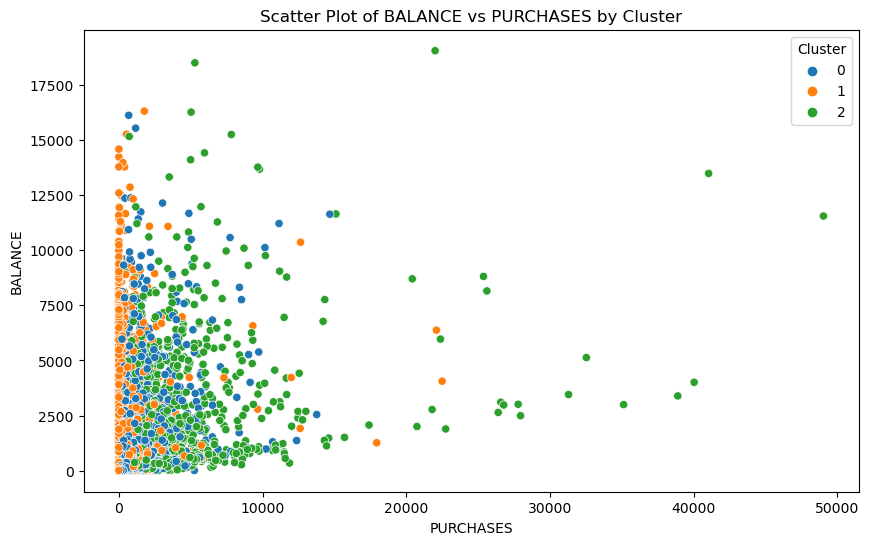

In [150]:

# SCATTER PLOT WITH Best Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, y='BALANCE', x='PURCHASES', hue='Cluster', palette='tab10')
plt.title('Scatter Plot of BALANCE vs PURCHASES by Clusters')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend(title='Cluster')
plt.show()


### Analyse All the Cluster Average

In [152]:
# Analysis of the average for each features per cluster
cluster_summary = features.groupby('Cluster').mean()
cluster_summary

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1138.840613           0.914410  1076.213112        275.007943   
1        1705.353844           0.826169   296.110013        232.907862   
2        1926.411411           0.973467  3189.655564       2392.029227   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    801.848844    502.190212             0.871642   
1                     63.391100   1356.571768             0.143562   
2                    797.626337    660.113655             0.892399   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.099976                          0.821061   
1                          0.081561                          0.060843   
2                          0.799331                          0.478113   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
0                      0.070666          1.731874      20.984207   
1                      0.185721          4.420051       2.680838   
2                      0.093716          2.335655      42.142061   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                  
0         3939.993891  1402.219236        910.710130          0.238506   
1         4145.263934  1477.335898        810.739419          0.068362   
2         6718.800329  3217.416822        765.241645          0.270231   

            TENURE  
Cluster             
0        11.517229  
1        11.447335  
2        11.747911

### CLuster Labeling
Based on the Average for each features we were able to label each cluster after considering their average balances, purchases, purchaase frequencies, cash advance, credit limit etc

In [175]:
def label_clusters(row):
    if row['Cluster'] == 0:
        return 'Moderate Spenders with High Installments'
    elif row['Cluster'] == 1:
        return 'Cash Advance Dependent / Low Purchasers'
    elif row['Cluster'] == 2:
        return 'High Spenders / Active Users'

features['Cluster_Label'] = features.apply(label_clusters, axis=1)


## Recommendations to Marketing Team

#### Cluster 0
**Moderate Spenders with High Installments:** Customers in Cluster 0 seem to have moderate balances and make moderate purchases with a high tendency to make installment purchases. They also use cash advances but not excessively. They make regular payments, though they don't fully pay off their balances regularly. 
**Advice:** Campaigns promoting benefits of paying off balances (e.g., lower interest or cashback) could help increase their percentage of full payments.

#### Cluster 1
**Cash Advance Dependent / Low Purchasers:** This cluster has moderate-high balances, but their purchase activity is very low. Instead, they rely heavily on cash advances, which is reflected in the high value for CASH_ADVANCE. Their purchase frequency is low, and they make low full payments (only 6.8%). 
**Advice:** Encourage more card usage by offering rewards or cashback for purchases. These users might need motivation to make more regular purchases instead of relying solely on cash advances.


#### Cluster 2
**High Spenders / Active Users:** Customers in Cluster 2 are high spenders, with very high PURCHASES and ONEOFF_PURCHASES. They make frequent purchases (both one-off and installment-based) and have high credit limits. They also have high payments, reflecting their overall high financial activity. 
**Advice:** Introduce limited-time offers or luxury incentives tailored to high-spending customers to maintain their loyalty and engagement.

### RECOMMENDATION BASED EACH FEATURES BY CLUSTER

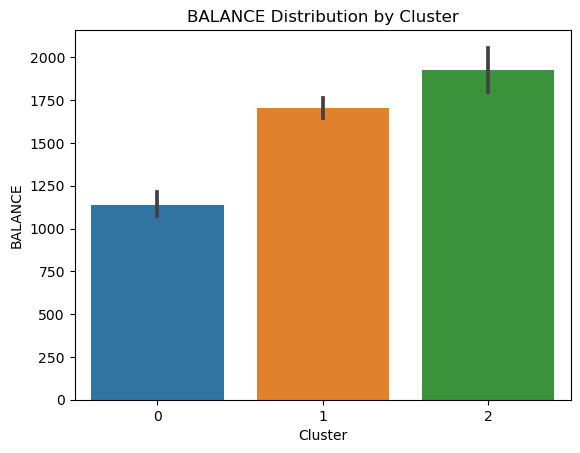

In [176]:
# Plotting the distribution of a few key features for each cluster
sns.barplot(x='Cluster', y='BALANCE', data=features)
plt.title('BALANCE Distribution by Cluster')
plt.show()

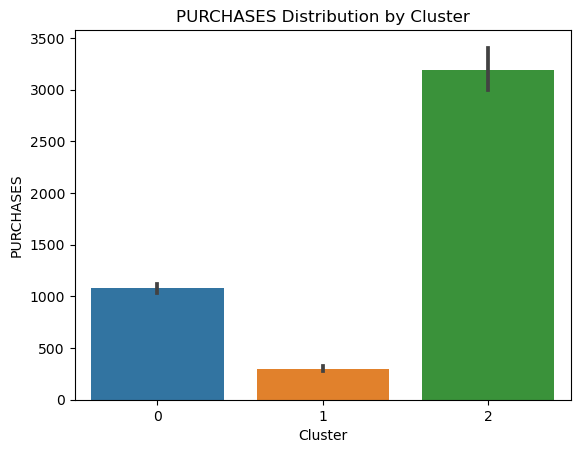

In [177]:

sns.barplot(x='Cluster', y='PURCHASES', data=features)
plt.title('PURCHASES Distribution by Cluster')
plt.show()


### Recommendation Based on Purchases

1. **Cluster 2** has the highest number of purchases by a significant margin. This indicates that customers in this cluster are more likely to engage in purchasing behavior. We'll prioritize marketing efforts, promotions, loyality rewards, premium services and product recommendations tailored specifically to the preferences and behaviors of this cluster to further boost sales.

2. **Cluster 1** has the lowest number of purchases. This could suggest either a lower engagement level or a mismatch between product offerings and customer needs. we’ll look into what they need and create some targeted incentives to get them more engaged.

3. **Cluster 0** showed moderate purchase activity. Targeted engagement strategies such as personalized offers, discounts, or loyalty programs could help boost their purchase frequency.

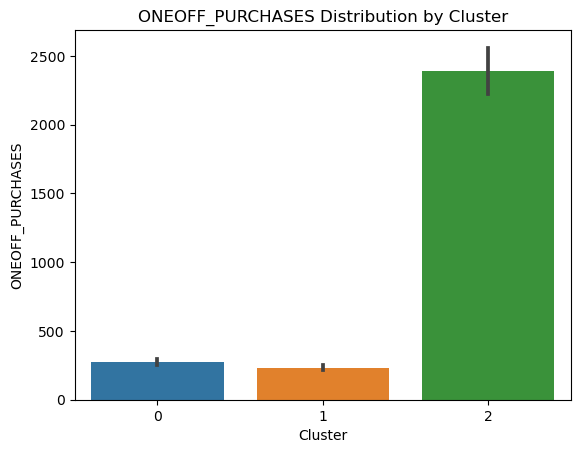

In [178]:

sns.barplot(x='Cluster', y='ONEOFF_PURCHASES', data=features)
plt.title('ONEOFF_PURCHASES Distribution by Cluster')
plt.show()



### Recommendation Based on One Off Purchases

1. **Leverage Cluster 2**: Since Cluster 2 dominates in one-off purchases, we’ll aim to convert these customers into repeat buyers by offering personalized follow-up deals or loyalty incentives.

2. **Encourage More from Cluster 0**: we’ll explore what products appeal to them most and target them with exclusive limited-time offers.

3. **Revitalize Cluster 1**: we’ll re-evaluate our approach and test new marketing strategies to spark interest and drive more sales from this group.


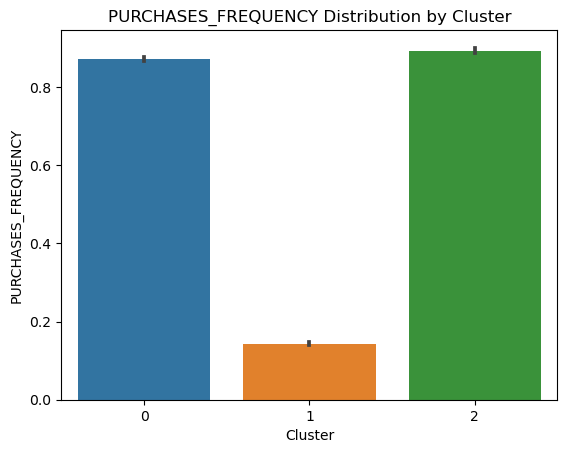

In [179]:
sns.barplot(x='Cluster', y='PURCHASES_FREQUENCY', data=features)
plt.title('PURCHASES_FREQUENCY Distribution by Cluster')
plt.show()



### Recommendation Based on Purchases Frequency

1. **Maximize on Cluster 0 and 2**: we’ll focus on nurturing loyalty incentives by introducing tiered rewards or personalized recommendations to keep them engaged and buying frequently.

2. **Boost Cluster 1**: This group shows the lowest purchase frequency. we’ll suggest launching investigation into what’s causing the low engagement and introduce strategies like flash sales or personalized re-engagement emails to encourage them to purchase more often.


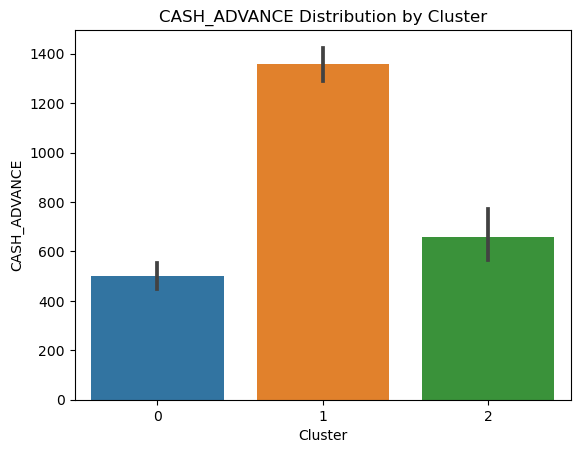

In [181]:
sns.barplot(x='Cluster', y='CASH_ADVANCE', data=features)
plt.title('CASH_ADVANCE Distribution by Cluster')
plt.show()


### Recommendation Based on Cash Advance

1. **Cluster 1 (Highest Cash Advance)**:we'll work to provide targeted Offers, premium services or products to this cluster, as they seem to have higher cash advance needs. We'll engage them by offering tools or resources to help manage their finances better, as high cash advances might indicate a need for better financial planning.

2. **Cluster 2 (Moderate Cash Advance)**: Offering flexible repayment plans options to help manage their cash advances more effectively. Provide educational content on budgeting and financial management to help reduce their reliance on cash advances.

3.  **Cluster 0 (Lowest Cash Advance)**: Rewarding this cluster for their lower cash advance usage with incentives like lower fees or cashback offers. Encourage savings plans or investment opportunities to maintain their low reliance on cash advances.dvances.


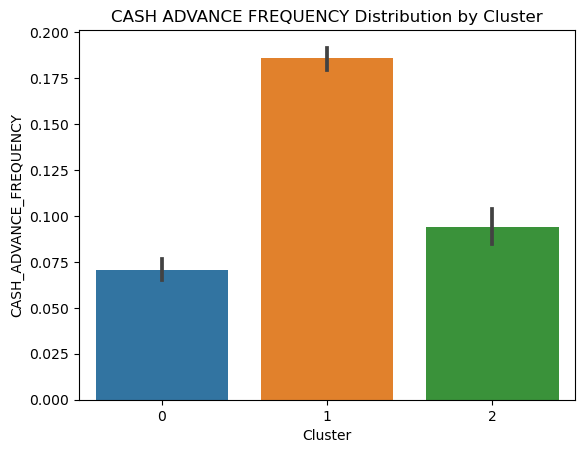

In [165]:

sns.barplot(x='Cluster', y='CASH_ADVANCE_FREQUENCY', data=features)
plt.title('CASH ADVANCE FREQUENCY Distribution by Cluster')
plt.show()


### Recommendation Based on Cash Advance Frequency

## Cluster 1 (Highest Frequency):
- Debt Management Programs: Offer debt management or consolidation programs to help reduce their reliance on frequent cash advances.
- Financial Counseling: Provide access to financial counseling services to help them manage their finances more effectively and reduce the need for frequent cash advances.

## Cluster 2 (Moderate Frequency):
- Budgeting Tools: Introduce budgeting tools and apps to help them track their spending and manage their cash flow better.
- Educational Workshops: Conduct workshops or webinars on financial literacy to help them understand the implications of frequent cash advances and how to avoid them.

## Cluster 0 (Lowest Frequency):
- Savings Incentives: Encourage this cluster to continue their good financial habits by offering savings incentives or rewards for maintaining low cash advance usage.
clusters?




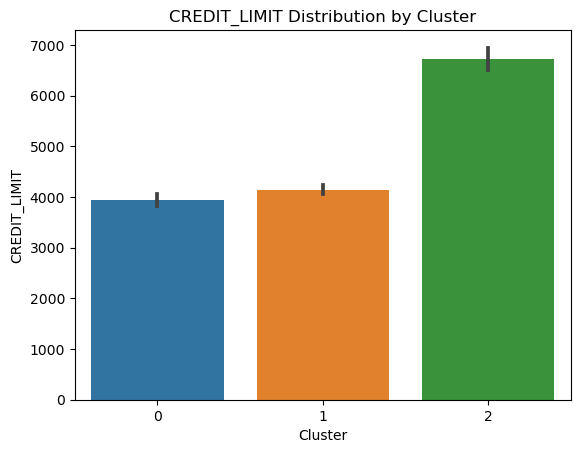

In [171]:

sns.barplot(x='Cluster', y='CREDIT_LIMIT', data=features)
plt.title('CREDIT_LIMIT Distribution by Cluster')
plt.show()


## Recommendation Based on Credit Limit

## Cluster 2: High Credit Limit Customers
- Premium Services: Offer exclusive credit cards with higher limits, lower interest rates, and premium rewards.
- Investment Opportunities: Provide tailored investment advice and financial planning services.
- Loyalty Programs: Develop loyalty programs with high-value rewards and benefits.
 
## Cluster 1: Moderate Credit Limit Customers
- Credit Limit Increases: Offer periodic credit limit increases based on their usage and payment history.
- Educational Resources: Provide resources on credit management and financial health.
- Flexible Payment Plans: Introduce flexible payment options and balance transfer offers.

## Cluster 0: Low Credit Limit Customers
- Credit Building Programs: Offer secured credit cards or credit-builder loans to help improve their credit scores.
- Budgeting Tools: Provide tools and apps to help them manage their finances effectively.
- Incentives for Good Behavior: Reward timely payments and responsible credit usage with incentives like cashback or lower fees.

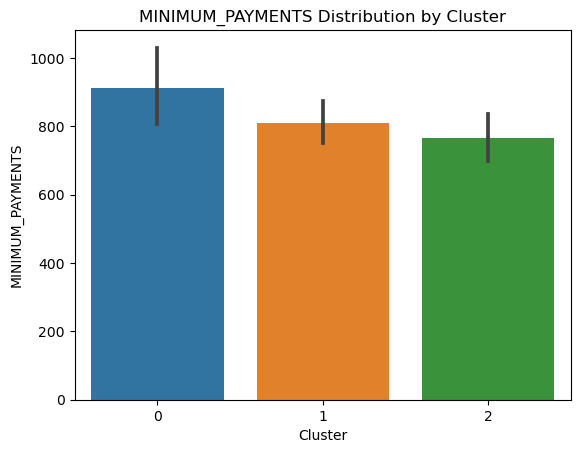

In [167]:

sns.barplot(x='Cluster', y='MINIMUM_PAYMENTS', data=features)
plt.title('MINIMUM_PAYMENTS Distribution by Cluster')
plt.show()

### Recommendation Based on Minimum Payment

## Cluster 2: High Minimum Payments
- Debt Management Programs: Offer debt consolidation or management programs to help them reduce their balances.
- Financial Counseling: Provide access to financial counseling services to help them manage their finances more effectively.
- Incentives for Higher Payments: Encourage paying more than the minimum with incentives like lower interest rates or rewards.

## Cluster 1: Moderate Minimum Payments
- Flexible Payment Plans: Offer flexible payment options to help them manage their balances more effectively.
- Educational Resources: Provide resources on credit management and financial health to encourage paying more than the minimum.
- Balance Transfer Offers: Introduce balance transfer offers with lower interest rates to help them pay down their balances faster.

## Cluster 0: Low Minimum Payments
- Rewards for Good Behavior: Reward timely payments and responsible credit usage with incentives like cashback or lower fees.
- Promote Savings: Encourage savings plans or investment opportunities to maintain their good financial habits.
- Credit Limit Increases: Consider offering periodic credit limit increases based on their responsible credit usage.dit usage.es faster.st rates or rewards.
